# Football Transfers 2022 Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\avlbe\Desktop\Data Science\Datasets\2022FootballTransfers.csv")
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,01/09/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,01/09/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,01/09/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,01/09/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,01/09/2022


The "cost" column currently is a list of objects and therefore we need to convert to floats in order to conduct analysis. We start by manually removing the "€" and then we define a function to convert to floats. This is shown below.

In [4]:
df.cost = df["cost"].str.replace("€","")

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'Th' in x:
        if len(x) > 1:
            return float(x.replace('Th', '')) * 1000
        return 1000.0
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    return 0.0

df['cost'] = df['cost'].apply(value_to_float)

df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000.0,01/09/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000.0,01/09/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000.0,01/09/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000.0,01/09/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000.0,01/09/2022


**AGE & COST**

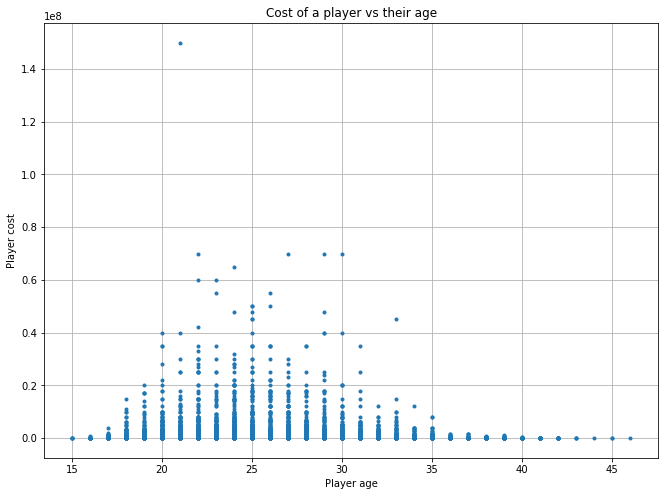

In [5]:
plt.figure(figsize=(11,8))
plt.plot(df.age, df.cost,".")
plt.grid(True)
plt.title("Cost of a player vs their age")
plt.xlabel("Player age")
plt.ylabel("Player cost");

With this distribution of data, a Gaussian "bell" shaped curve would likely be most suitable. The Guassian function is as follows:
$$G\left(x\right)=ae^{-\frac{\left(x-x_0\right)^2}{2c^2}}$$

$a$ is the height of the curves peak, $x_0$ is the center of the peak, $c$ is the standard deviation.

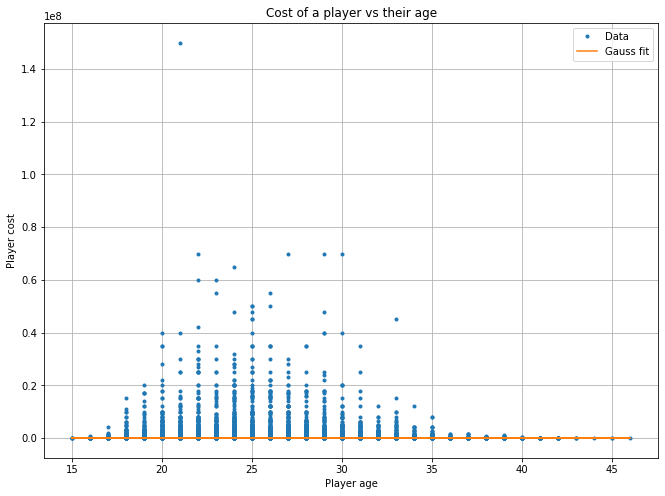

In [6]:
import scipy.stats as stats
from scipy.optimize import curve_fit

plt.figure(figsize=(11,8))
plt.plot(df.age, df.cost,".",label="Data")
plt.plot(df.age,stats.norm.pdf(df.age, 0, 1),label="Gauss fit")
plt.grid(True)
plt.title("Cost of a player vs their age")
plt.xlabel("Player age")
plt.ylabel("Player cost")
plt.legend();

As we can see, the fit isn't meaningful because the data is so concentrated at low values. Let's try filtering the data.

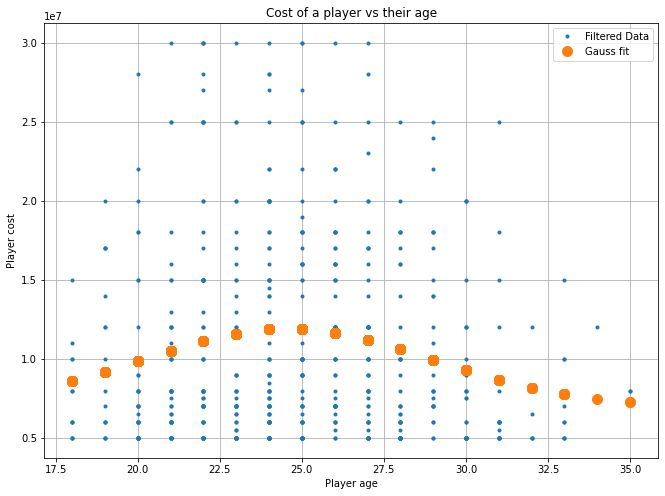

In [7]:
from scipy.optimize import curve_fit

cost_filter = df.loc[(df.cost >= 0.5e7) & (df.cost <= 3e7)] # transfers between 5 million and 30 million

def gaussian(x,x0,sigma, y0, h):
    '''Returns a single value or 1D array of Gaussian function values for 
    - input x-value or array of x-values: x
    - mean value of distribution: x0
    - standard deviation of distribution: sigma
    - background value y0
    - peak height, h (measured from background level y0)'''
    gauss = h * np.exp(-(x-x0)**2/(2*sigma**2)) + y0 # the gaussian itself
    return gauss

guess = [25,5,0.5e7,0.5e8] # list of initial guess parameters

#popt: Optimized parameters
#pcov: matrix of covariance.
popt,pcov = curve_fit(gaussian,cost_filter.age,cost_filter.cost, p0 = guess)

plt.figure(figsize=(11,8))
plt.plot(cost_filter.age, cost_filter.cost,".",label="Filtered Data")
plt.plot(cost_filter.age, gaussian(cost_filter.age, *popt), ".",label="Gauss fit",markersize=20)
plt.grid(True)
plt.title("Cost of a player vs their age")
plt.xlabel("Player age")
plt.ylabel("Player cost")
plt.legend();

As you can see, a Gaussian fit is probably not sensible here. This is likely because the $x$ values are discrete data entries (you can't have an age which isn't an integer). But it still gives a trend in the data, showing that the most preferrable age for football clubs is $\sim$ 25.

**ANALYSIS BY COUNTRY OF NEW CLUB**

In [8]:
## locating data based on country ##
c0 = ["France", df.loc[df.country_new_club == "France"]]
c1 = ["Germany", df.loc[df.country_new_club == "Germany"]]
c2 = ["England", df.loc[df.country_new_club == "England"]]
c3 = ["Israel", df.loc[df.country_new_club == "Israel"]]
c4 = ["Italy", df.loc[df.country_new_club == "Italy"]]
c5 = ["Turkey", df.loc[df.country_new_club == "Turkey"]]
c6 = ["Spain", df.loc[df.country_new_club == "Spain"]]
c7 = ["Portugal", df.loc[df.country_new_club == "Portugal"]]
c8 = ["Greece", df.loc[df.country_new_club == "Greece"]]
c9 = ["Russia", df.loc[df.country_new_club == "Russia"]]
c10 = ["Egypt", df.loc[df.country_new_club == "Egypt"]]
c11 = ["Belgium", df.loc[df.country_new_club == "Belgium"]]
c12 = ["Slovakia", df.loc[df.country_new_club == "Slovakia"]]
c13 = ["Wales", df.loc[df.country_new_club == "Wales"]]
c14 = ["Scotland", df.loc[df.country_new_club == "Scotland"]]
c15 = ["Ireland", df.loc[df.country_new_club == "Ireland"]]
c16 = ["Hungary", df.loc[df.country_new_club == "Hungary"]]
c17 = ["Switzerland", df.loc[df.country_new_club == "Switzerland"]]
c18 = ["Poland", df.loc[df.country_new_club == "Poland"]]
c19 = ["Bulgaria", df.loc[df.country_new_club == "Bulgaria"]]
c20 = ["Norway", df.loc[df.country_new_club == "Norway"]]
c21 = ["Finland", df.loc[df.country_new_club == "Finland"]]
c22 = ["Bosnia-Herzegovina", df.loc[df.country_new_club == "Bosnia-Herzegovina"]]
c23 = ["Brazil", df.loc[df.country_new_club == "Brazil"]]
c24 = ["Argentina", df.loc[df.country_new_club == "Argentina"]]
c25 = ["Uruguay", df.loc[df.country_new_club == "Uruguay"]]
c26 = ["Peru", df.loc[df.country_new_club == "Peru"]]
c27 = ["Chile", df.loc[df.country_new_club == "Chile"]]
c28 = ["Colombia", df.loc[df.country_new_club == "Colombia"]]
c29 = ["United States", df.loc[df.country_new_club == "United States"]]

##research if there is cleaner way to do this

In [9]:
## player ages ##

av_age = np.empty((0,3),int)
country_array = np.empty((0,3),int)
max_age = np.empty((0,3),int)

for i in range(0,30):
    
    average = np.mean(globals()[f'c{i}'][1].age)
    max1 = np.max(globals()[f'c{i}'][1].age)
    data_size = np.size(globals()[f'c{i}'][1].age)
    country = globals()[f'c{i}'][0]
    av_age = np.append(av_age,average)
    country_array = np.append(country_array,country)
    max_age = np.append(max_age,max1)

In [10]:
## player costs ##

av_cost = np.empty((0,3),int)
max_cost = np.empty((0,3),int)

for i in range(0,30):
    
    average2 = np.mean(globals()[f'c{i}'][1].cost)
    max2 = np.max(globals()[f'c{i}'][1].cost)
    data_size = np.size(globals()[f'c{i}'][1].cost)
    country = globals()[f'c{i}'][0]
    av_cost = np.append(av_cost,average2)
    max_cost = np.append(max_cost,max2)

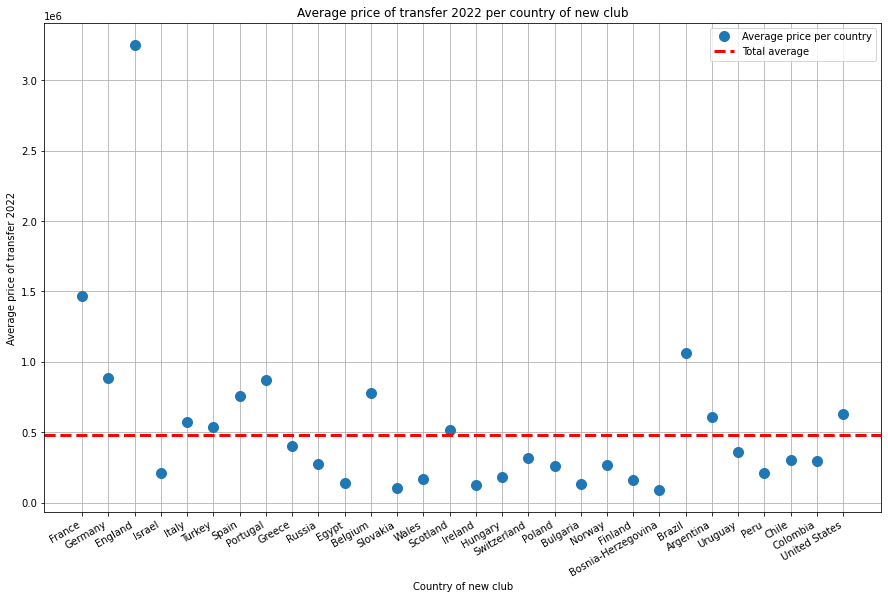

In [11]:
plt.figure(figsize=(15,10))
plt.plot(country_array, av_cost, ".",label="Average price per country", markersize=20)
plt.xlabel("Country of new club")
plt.ylabel("Average price of transfer 2022")
plt.title("Average price of transfer 2022 per country of new club")
plt.grid(True)
plt.axhline(y=np.mean(df.cost),color='red', linestyle='--', linewidth=3, label='Total average')
plt.legend()
plt.gcf().autofmt_xdate()

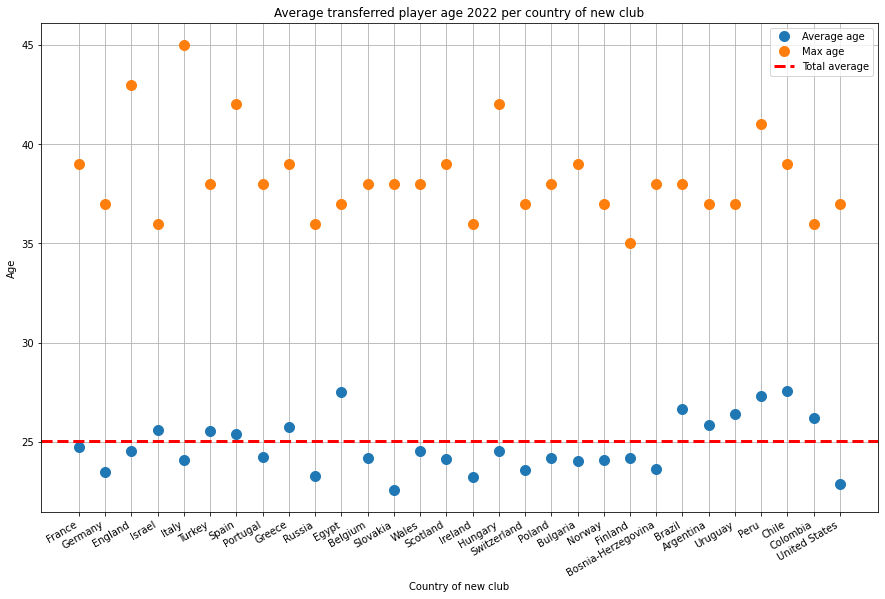

In [12]:
plt.figure(figsize=(15,10))
plt.plot(country_array, av_age, ".",markersize=20,label="Average age")
plt.plot(country_array, max_age, ".",markersize=20,label="Max age")
plt.xlabel("Country of new club")
plt.ylabel("Age")
plt.title("Average transferred player age 2022 per country of new club")
plt.axhline(y=np.mean(df.age),color='red', linestyle='--', linewidth=3, label='Total average')
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()

It would appear that the Slovakian and USA leagues have been targetting their investment on younger players, whereas it's quite the opposite for Egyptian and Chilean leagues.

**ANALYSIS BY LEAGUE**

In [13]:
## checking the frequency of each league ##
df.groupby('league_new_club').league_new_club.count()

league_new_club
1. CFL                   87
1. Dorostenecka liga      1
1. Liga gr. 1            24
1. Liga gr. 2            23
1. Liga gr. 3            30
                       ... 
Ykkönen                  23
Zambia                    2
Zimbabwe                  2
eWinner 2 liga           37
efbet Liga              132
Name: league_new_club, Length: 463, dtype: int64

In [14]:
## ordering the frequencies ##
df.groupby('league_new_club').league_new_club.count().sort_values(ascending=False)

league_new_club
Italy              819
Spain              497
Liga 2             437
Premier Liga       353
Romania            352
                  ... 
VL Hessen-Mitte      1
VL Hessen-Nord       1
VL Hessen-Süd        1
Nigeria              1
Senegal              1
Name: league_new_club, Length: 463, dtype: int64

In [15]:
leagues_by_len = df.groupby(['league_new_club']).agg([len])
leagues_by_len.head()

## although, this .agg() function transforms all the data to the group frequency of "league_new_club", we can still use
## it to locate the most the leagues with the most transfers (investigating a cleaner way of doing this) ##

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,country_new_club,cost,date_of_transfer
,len,len,len,len,len,len,len,len,len,len
league_new_club,,,,,,,,,,
1. CFL,87,87,87.0,87,87,87,87,87,87.0,87
1. Dorostenecka liga,1,1,1.0,1,1,1,1,1,1.0,1
1. Liga gr. 1,24,24,24.0,24,24,24,24,24,24.0,24
1. Liga gr. 2,23,23,23.0,23,23,23,23,23,23.0,23
1. Liga gr. 3,30,30,30.0,30,30,30,30,30,30.0,30


In [16]:
## only leagues with above 250 transfers 
league_filter = leagues_by_len.loc[(leagues_by_len.league_origin_club.len >= 250) & (leagues_by_len.league_origin_club.len <= 800)]
## also including a upper boundary to exlucde the Italy league, as this is likely a cumulation of all the Series Leagues

In [17]:
league_filter

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,country_new_club,cost,date_of_transfer
,len,len,len,len,len,len,len,len,len,len
league_new_club,,,,,,,,,,
1.Division,275,275,275.0,275,275,275,275,275,275.0,275
Azadegan League,270,270,270.0,270,270,270,270,270,270.0,270
Bundesliga,254,254,254.0,254,254,254,254,254,254.0,254
Championship,262,262,262.0,262,262,262,262,262,262.0,262
League One,309,309,309.0,309,309,309,309,309,309.0,309
Liga 2,437,437,437.0,437,437,437,437,437,437.0,437
Premier League,341,341,341.0,341,341,341,341,341,341.0,341
Premier Liga,353,353,353.0,353,353,353,353,353,353.0,353


In [18]:
## grouping data for the for loop to come ##
l0 = [league_filter.index[0], df.loc[df.league_new_club == "1.Division"]]
l1 = [league_filter.index[1], df.loc[df.league_new_club == "Azadegan League"]]
l2 = [league_filter.index[2], df.loc[df.league_new_club == "Bundesliga"]]
l3 = [league_filter.index[3], df.loc[df.league_new_club == "Championship"]]
l4 = [league_filter.index[4], df.loc[df.league_new_club == "League One"]]
l5 = [league_filter.index[5], df.loc[df.league_new_club == "Liga 2"]]
l6 = [league_filter.index[6], df.loc[df.league_new_club == "Premier League"]]
l7 = [league_filter.index[7], df.loc[df.league_new_club == "Premier Liga"]]
l8 = [league_filter.index[8], df.loc[df.league_new_club == "Romania"]]
l9 = [league_filter.index[9], df.loc[df.league_new_club == "Serbia"]]
l10 = [league_filter.index[10], df.loc[df.league_new_club == "Serie A"]]
l11 = [league_filter.index[11], df.loc[df.league_new_club == "Serie B"]]
l12 = [league_filter.index[12], df.loc[df.league_new_club == "Serie C - A"]]
l13 = [league_filter.index[13], df.loc[df.league_new_club == "Serie C - B"]]
l14 = [league_filter.index[14], df.loc[df.league_new_club == "Serie C - C"]]
l15 = [league_filter.index[15], df.loc[df.league_new_club == "Spain"]]

In [19]:
## player ages ##

av_age = np.empty((0,3),int)
league_array = np.empty((0,3),int)
max_age = np.empty((0,3),int)

for i in range(0,16):
    
    average = np.mean(globals()[f'l{i}'][1].age)
    max1 = np.max(globals()[f'l{i}'][1].age)
    data_size = np.size(globals()[f'l{i}'][1].age)
    league = globals()[f'l{i}'][0]
    av_age = np.append(av_age,average)
    league_array = np.append(league_array,league)
    max_age = np.append(max_age,max1)

In [20]:
## player costs ##

av_cost = np.empty((0,3),int)
max_cost = np.empty((0,3),int)

for i in range(0,16):
    
    average2 = np.mean(globals()[f'l{i}'][1].cost)
    max2 = np.max(globals()[f'l{i}'][1].cost)
    data_size = np.size(globals()[f'l{i}'][1].cost)
    league = globals()[f'l{i}'][0]
    av_cost = np.append(av_cost,average2)
    max_cost = np.append(max_cost,max2)

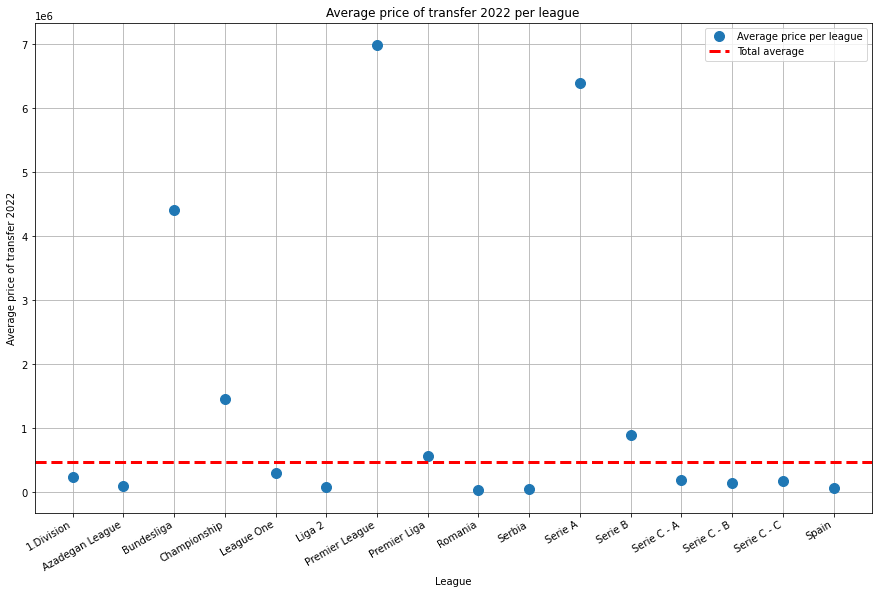

In [21]:
plt.figure(figsize=(15,10))
plt.plot(league_array, av_cost, ".",label="Average price per league", markersize=20)
plt.xlabel("League")
plt.ylabel("Average price of transfer 2022")
plt.title("Average price of transfer 2022 per league")
plt.grid(True)
plt.axhline(y=np.mean(df.cost),color='red', linestyle='--', linewidth=3, label='Total average')
plt.legend()
plt.gcf().autofmt_xdate()

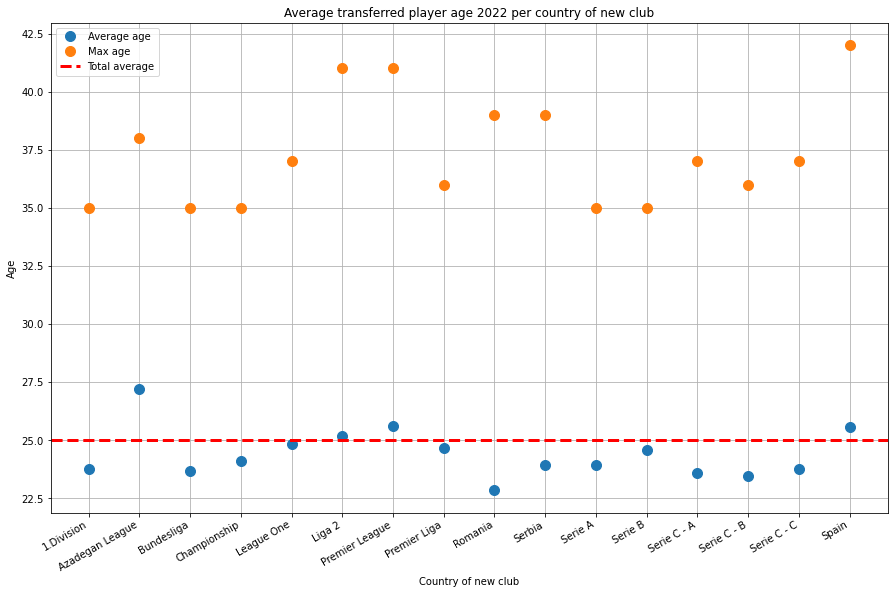

In [22]:
plt.figure(figsize=(15,10))
plt.plot(league_array, av_age, ".",markersize=20,label="Average age")
plt.plot(league_array, max_age, ".",markersize=20,label="Max age")
plt.xlabel("Country of new club")
plt.ylabel("Age")
plt.title("Average transferred player age 2022 per country of new club")
plt.axhline(y=np.mean(df.age),color='red', linestyle='--', linewidth=3, label='Total average')
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()